In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.4.1'

# Manipulation de données

In [3]:
df=pd.read_csv('nodes-addresses.csv',low_memory=False)

In [4]:
df["sourceID"]

0                                      Bahamas Leaks
1                                      Bahamas Leaks
2                                      Bahamas Leaks
3                                      Bahamas Leaks
4                                      Bahamas Leaks
                             ...                    
390990    Paradise Papers - Samoa corporate registry
390991    Paradise Papers - Samoa corporate registry
390992    Paradise Papers - Samoa corporate registry
390993    Paradise Papers - Samoa corporate registry
390994    Paradise Papers - Samoa corporate registry
Name: sourceID, Length: 390995, dtype: object

In [5]:
df[df["sourceID"]=="Offshore Leaks"]

,_id,node_id,address,name,countries,country_codes,sourceID,valid_until,note
93984,781556,2004267,One Bearer Secured Debenture,NaN,Not identified,XXX,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN
93985,781557,67277,"11 Coomber Road, The Peak, Hong Kong",NaN,Hong Kong,HKG,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN
93986,781558,67346,"4 Irish Place 2nd Floor, Gibraltar.",NaN,Gibraltar,GIB,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN
93987,781559,67278,"11A, Branksome 3 Tregunter Path Mid-Levels Hon...",NaN,Hong Kong,HKG,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN
93988,781560,67282,14 Lysander Road West Mailing Kent ME19 4TT,NaN,United Kingdom,GBR,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN
...,...,...,...,...,...,...,...,...,...
151579,839151,67598,"10B/15 Shun Ning Road, Kowloon, Hong Kong",NaN,Hong Kong,HKG,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN
151580,839152,67476,"ul.Rudnevoy 19A,Berdyansk, Ukraine.",NaN,Ukraine,UKR,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN
151581,839153,67530,10 Hill Close Peckleton Leicestershire UNITED ...,NaN,United Kingdom,GBR,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN
151582,839154,67532,"10 Lichfield Road, London, NW2 2RE",NaN,United Kingdom,GBR,Offshore Leaks,The Offshore Leaks data is current through 2010,NaN


In [6]:
df["sourceID"].value_counts()

Paradise Papers - Malta corporate registry                   123266
Panama Papers                                                 93454
Paradise Papers - Appleby                                     59200
Offshore Leaks                                                57600
Paradise Papers - Barbados corporate registry                 20768
Paradise Papers - Aruba corporate registry                    17901
Pandora Papers - Alemán, Cordero, Galindo & Lee (Alcogal)     13100
Pandora Papers - Fidelity Corporate Services                   2940
Paradise Papers - Samoa corporate registry                     1695
Bahamas Leaks                                                   551
Paradise Papers - Bahamas corporate registry                    333
Paradise Papers - Nevis corporate registry                      187
Name: sourceID, dtype: int64

# Exercice I avec Pandas

#### 1.Combien de pays ont été déclarés dans les offshore leaks ? (nodes-addresses.csv)

In [7]:
a=df.loc[df["sourceID"]=="Offshore Leaks", ['countries', 'sourceID']]
a['countries'].value_counts()

Taiwan           12361
Hong Kong        11894
China             7806
Singapore         3909
United States     3766
                 ...  
Botswana             1
Macedonia            1
Niger                1
Sierra Leone         1
Angola               1
Name: countries, Length: 172, dtype: int64

#### 2.Dans combien d'entrée le mot "Ireland" est présent ? (nodes-addresses.csv)

In [8]:
df[df["countries"]=="Ireland"].count()

_id              899
node_id          899
address          892
name             622
countries        899
country_codes    899
sourceID         899
valid_until      899
note               0
dtype: int64

#### 3.Dans combien de montage apparrait "EL PORTADOR" ? (nodes-officers.csv)

In [9]:
df1=pd.read_csv('nodes-officers.csv',low_memory=False)

In [10]:
b=df1[df1["name"]=="EL PORTADOR"]
b["name"].value_counts()

EL PORTADOR    9325
Name: name, dtype: int64

# Utilisation de Seaborn

#### 4.Faites un histogramme des pays qui ont été déclarés dans les offshore leaks

<AxesSubplot:xlabel='countries', ylabel='count'>

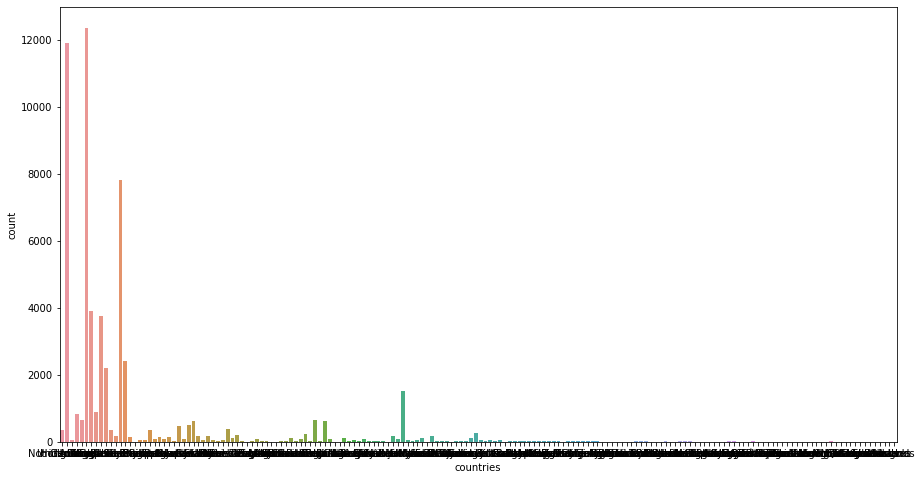

In [11]:
plt.figure(figsize = (15,8))
sns.countplot(x='countries', data = a)

#### 5.Est on en présence d'une loi normale si non quel est le top 20 des pays les plus déclarrés ?

<AxesSubplot:xlabel='countries', ylabel='count'>

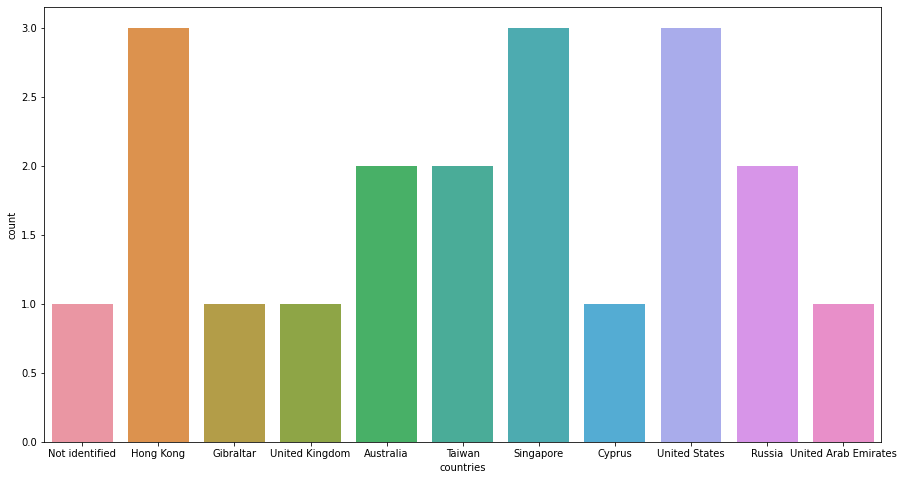

In [12]:
plt.figure(figsize = (15,8))
sns.countplot(x="countries", data=a.head(20))

# Reconstruction de la base de données

#### Merger selon le graphe les dataframes pour avoir sur un même dataframe le sous graphe suivante "officer --- officer of ---> entity".

In [13]:
df2=pd.read_csv('relationships.csv',low_memory=False)
df4=pd.read_csv('nodes-entities.csv',low_memory=False)

In [14]:
df3=df2[df2['_type']== 'officer_of']

In [15]:
m=pd.merge(df1,df3, how='inner',left_on='_id', right_on='_start')

In [16]:
m = m.merge(df4, left_on='_end',right_on='_id')
m

,_id_x,node_id_x,name_x,countries_x,country_codes_x,sourceID_x,valid_until_x,note_x,_start,_end,...,struck_off_date,dorm_date,status_y,service_provider,ibcRUC,country_codes_y,countries_y,sourceID,valid_until_y,note_y
0,228598,12000001,KIM SOO IN,South Korea,KOR,Panama Papers,The Panama Papers data is current through 2015,NaN,228598,74508,...,31-OCT-2007,NaN,Defaulted,Mossack Fonseca,211317,USA,United States,Panama Papers,The Panama Papers data is current through 2015,NaN
1,323378,12097201,SONG SI HAN,South Korea,KOR,Panama Papers,The Panama Papers data is current through 2015,NaN,323378,74508,...,31-OCT-2007,NaN,Defaulted,Mossack Fonseca,211317,USA,United States,Panama Papers,The Panama Papers data is current through 2015,NaN
2,326697,12100428,HYUN MYUNG CHUL,Russia,RUS,Panama Papers,The Panama Papers data is current through 2015,NaN,326697,74508,...,31-OCT-2007,NaN,Defaulted,Mossack Fonseca,211317,USA,United States,Panama Papers,The Panama Papers data is current through 2015,NaN
3,335419,12109116,KIM WALTER YANGHOON,United States,USA,Panama Papers,The Panama Papers data is current through 2015,NaN,335419,74508,...,31-OCT-2007,NaN,Defaulted,Mossack Fonseca,211317,USA,United States,Panama Papers,The Panama Papers data is current through 2015,NaN
4,431596,12205214,MALIVANOV SERGUEI,Hong Kong,HKG,Panama Papers,The Panama Papers data is current through 2015,NaN,431596,74508,...,31-OCT-2007,NaN,Defaulted,Mossack Fonseca,211317,USA,United States,Panama Papers,The Panama Papers data is current through 2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686128,1969294,240050867,HASHEM KHOSROVANI,United Arab Emirates,ARE;CHE,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Provider data is current through 2017,NaN,1969294,1607897,...,NaN,NaN,Active,NaN,1558911,VGB,British Virgin Islands,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Provider data is current through 2017,NaN
1686129,1969304,240069001,Edgardo Eloy Díaz,Panama,PAN,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN,1969304,1969303,...,NaN,NaN,Dissolved,NaN,NaN,BLZ,Belize,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN
1686130,1969305,240069002,José Creuheras Margenat,Spain,ESP,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN,1969305,1969303,...,NaN,NaN,Dissolved,NaN,NaN,BLZ,Belize,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN
1686131,1969306,240069003,Columna Marti Pico,NaN,NaN,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN,1969306,1969303,...,NaN,NaN,Dissolved,NaN,NaN,BLZ,Belize,"Pandora Papers - Alemán, Cordero, Galindo & Le...",Pandora Papers - Alcogal data is current throu...,NaN


# Exercice III

#### 6.Combien de service providers ont été déclarés dans les offshore leaks et quelle est la proportion de ces service providers vis-à-vis de des officers ?

In [17]:
m[["name_x","service_provider"]].groupby(by="service_provider").sum()

,name_x
service_provider,
Appleby,Ibrahim MahamaEngineers & Planners Company Lim...
Commonwealth Trust Limited,Geoffrey TaylorSergey LinkovIrina KazantsevaGe...
Mossack Fonseca,KIM SOO INSONG SI HANHYUN MYUNG CHULKIM WALTER...
Portcullis Trustnet,Bisbro Investment Company Ltd.Dr. Yousuf Al-Fa...
